In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [15]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

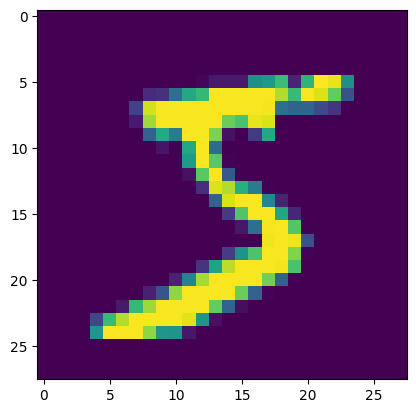

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [10]:
history=model.fit(X_train,y_train,epochs=20,validation_split=.2)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0944 - val_accuracy: 0.9798
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0160 - accuracy: 0.9946 - val_loss: 0.1047 - val_accuracy: 0.9782
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.0998 - val_accuracy: 0.9771
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0158 - accuracy: 0.9947 - val_loss: 0.1172 - val_accuracy: 0.9748
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0107 - accuracy: 0.9964 - val_loss: 0.1090 - val_accuracy: 0.9785
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.1265 - val_accuracy: 0.9764
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.1155 - val_accuracy:

In [11]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [12]:
y_pred=y_prob.argmax(axis=1)

In [2]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test,y_pred)

0.9774

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [16]:
cm=confusion_matrix(y_test,y_pred)

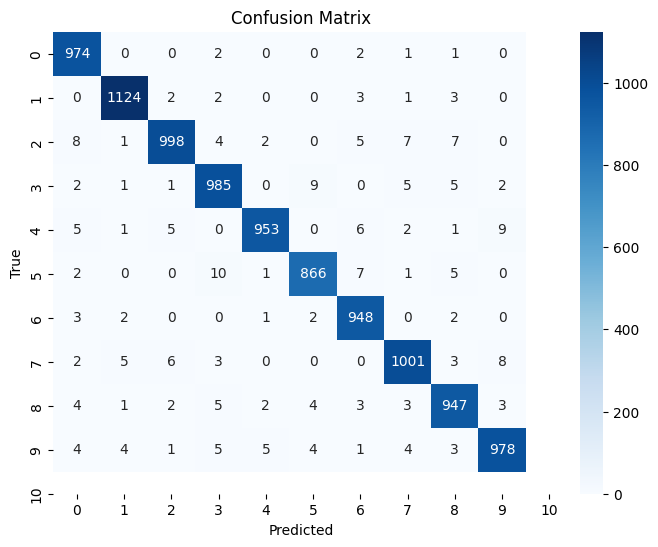

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2','3','4','5','6','7','8','9','10'], yticklabels=['0', '1', '2','3','4','5','6','7','8','9','10'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

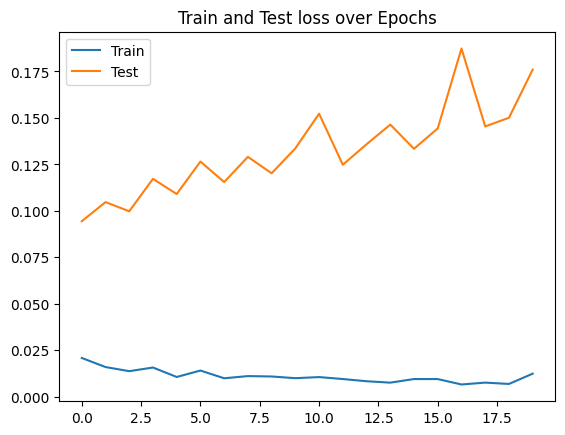

In [18]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.title("Train and Test loss over Epochs")
plt.legend()

In [19]:
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=5,verbose=1,mode="auto",baseline=None,restore_best_weights=False,start_from_epoch=0)

history=model.fit(X_train,y_train,epochs=20,validation_split=.2,callbacks=early_stopping)

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2562 - accuracy: 0.9244 - val_loss: 0.1299 - val_accuracy: 0.9612
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1074 - accuracy: 0.9672 - val_loss: 0.1072 - val_accuracy: 0.9668
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0722 - accuracy: 0.9771 - val_loss: 0.1047 - val_accuracy: 0.9681
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0570 - accuracy: 0.9822 - val_loss: 0.0934 - val_accuracy: 0.9722
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0424 - accuracy: 0.9862 - val_loss: 0.0866 - val_accuracy: 0.9758
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0329 - accuracy: 0.9894 - val_loss: 0.0957 - val_accuracy: 0.9743
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0301 - accuracy: 0.9898 - val_loss: 0.1031 - val_accuracy:

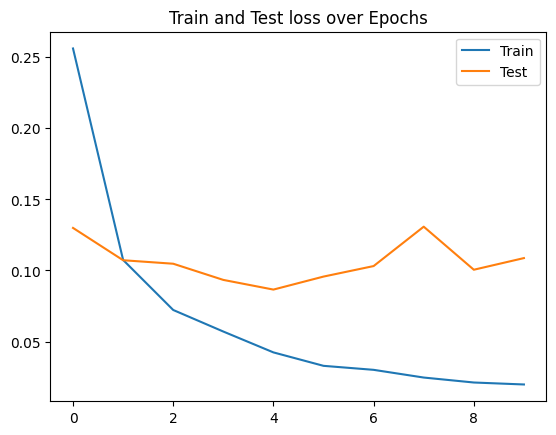

In [21]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.title("Train and Test loss over Epochs")
plt.legend()

In [22]:
from tensorflow.keras.layers import Dropout

In [23]:
# Drop Out
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(X_train,y_train,epochs=20,validation_split=.2)

Epoch 1/20
1500/1500 [==============================] - 8s 4ms/step - loss: 0.3408 - accuracy: 0.8981 - val_loss: 0.1360 - val_accuracy: 0.9596
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1598 - accuracy: 0.9521 - val_loss: 0.1066 - val_accuracy: 0.9673
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1233 - accuracy: 0.9630 - val_loss: 0.0977 - val_accuracy: 0.9723
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1000 - accuracy: 0.9689 - val_loss: 0.0863 - val_accuracy: 0.9748
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0902 - accuracy: 0.9714 - val_loss: 0.0819 - val_accuracy: 0.9762
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0823 - accuracy: 0.9749 - val_loss: 0.0856 - val_accuracy: 0.9739
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0712 - accuracy: 0.9774 - val_loss: 0.0828 - val_accuracy:

In [24]:
y_prob = model.predict(X_test)
y_pred=y_prob.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [25]:
accuracy_score(y_test,y_pred)

0.981

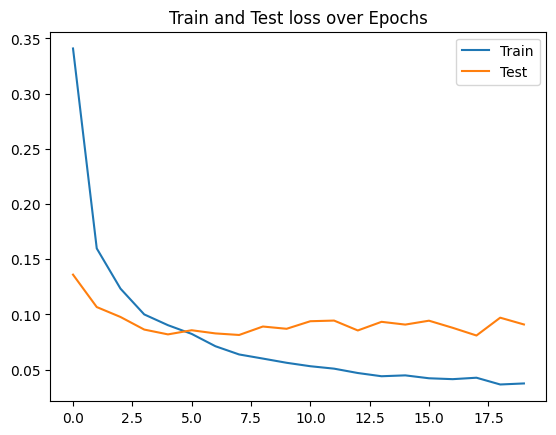

In [26]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.title("Train and Test loss over Epochs")
plt.legend()

In [7]:
pip install -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.5 MB/s eta 0:00:00


In [8]:
import kerastuner as kt

<ipython-input-8-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [30]:
def build_model(hp):
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(10,activation='softmax'))

  model.compile(optimizer=hp.Choice('optimizer',values=['Adam','sgd','rmsprop','Adamax','nadam']),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5)

tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 39s]
val_accuracy: 0.9771999716758728

Best val_accuracy So Far: 0.9771999716758728
Total elapsed time: 00h 04m 00s


In [34]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'nadam'}

In [39]:
model = tuner.get_best_models(num_models=1)[0]

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=5,verbose=1,mode="auto",baseline=None,restore_best_weights=False,start_from_epoch=0)
history = model.fit(X_train,y_train,epochs=20,initial_epoch=6,validation_split=0.2,callbacks=early_stopping)

Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0065 - accuracy: 0.9982 - val_loss: 0.0449 - val_accuracy: 0.9916
Epoch 8/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.0252 - val_accuracy: 0.9951
Epoch 9/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0065 - accuracy: 0.9985 - val_loss: 0.0472 - val_accuracy: 0.9916
Epoch 10/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.0449 - val_accuracy: 0.9922
Epoch 11/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0064 - accuracy: 0.9985 - val_loss: 0.0469 - val_accuracy: 0.9923
Epoch 12/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0050 - accuracy: 0.9988 - val_loss: 0.0602 - val_accuracy: 0.9916
Epoch 13/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0320 - val_accur

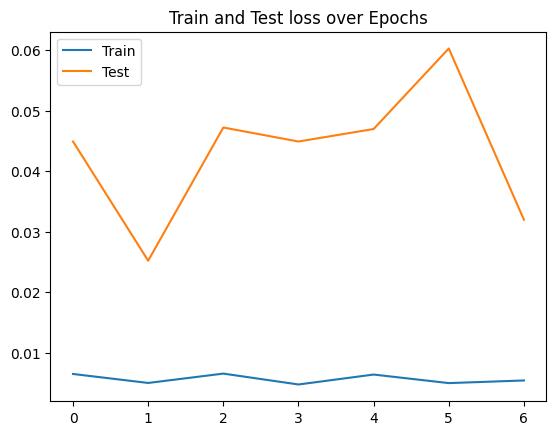

In [49]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.title("Train and Test loss over Epochs")
plt.legend()

In [68]:
def build_model(hp):
  model = Sequential()
  units = hp.Int('units',min_value=8,max_value=128,step=8)
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(units=units,activation='relu'))
  model.add(Dense(units=units,activation='relu'))
  model.add(Dense(10,activation='softmax'))

  optimizers = hp.Choice('optimizer',values=['Adam','sgd','rmsprop','Adamax','nadam'])
  model.compile(optimizer=optimizers,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

tuner = kt.RandomSearch(hypermodel=build_model,objective='val_accuracy',max_trials=5,directory='mydir',project_name='a')



Reloading Tuner from mydir/a/tuner0.json


In [69]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

In [70]:
tuner.get_best_hyperparameters()[0].values

{'units': 88, 'optimizer': 'Adamax'}

In [71]:
model=tuner.get_best_models(num_models=1)[0]

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 88)                69080     
                                                                 
 dense_1 (Dense)             (None, 88)                7832      
                                                                 
 dense_2 (Dense)             (None, 10)                890       
                                                                 
Total params: 77802 (303.91 KB)
Trainable params: 77802 (303.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
history = model.fit(X_train,y_train,epochs=20,initial_epoch=5,validation_split=0.2)

Epoch 6/20
1500/1500 [==============================] - 6s 3ms/step - loss: 1.4844 - accuracy: 0.5031 - val_loss: 0.4325 - val_accuracy: 0.8878
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3493 - accuracy: 0.9025 - val_loss: 0.2678 - val_accuracy: 0.9233
Epoch 8/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2444 - accuracy: 0.9307 - val_loss: 0.2049 - val_accuracy: 0.9421
Epoch 9/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1903 - accuracy: 0.9454 - val_loss: 0.1796 - val_accuracy: 0.9489
Epoch 10/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1553 - accuracy: 0.9549 - val_loss: 0.1516 - val_accuracy: 0.9564
Epoch 11/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1303 - accuracy: 0.9627 - val_loss: 0.1384 - val_accuracy: 0.9614
Epoch 12/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1116 - accuracy: 0.9675 - val_loss: 0.1293 - val_accura

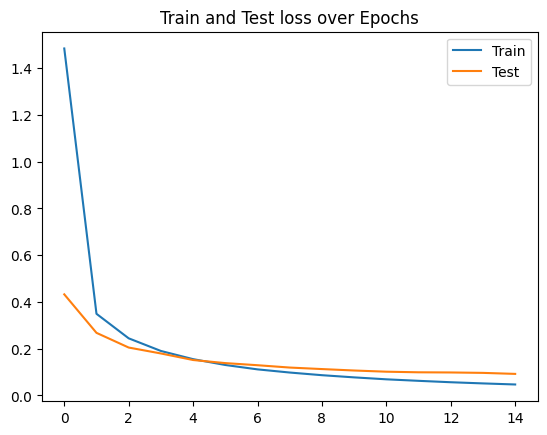

In [74]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.title("Train and Test loss over Epochs")
plt.legend()

In [ ]:
def build_model(hp):
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    model.add(Dense(88,activation='relu'))
  model.add(Dense(10,activation='softmax'))


In [4]:
def build_model(hp):
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))

  for i in range(hp.Int('num_layers',min_value=1,max_value=11)):
    model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=120,step=4),activation=hp.Choice('activation'+str(i),values=['relu','sigmoid','tanh','elu'])))

  model.add(Dense(10,activation='softmax'))

  model.compile(optimizer=hp.Choice('optimizer',values=['Adam','sgd','rmsprop','Adamax','nadam']),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model


In [13]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=10)

In [16]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 10 Complete [00h 00m 41s]
val_accuracy: 0.9107000231742859

Best val_accuracy So Far: 0.9182000160217285
Total elapsed time: 00h 07m 31s


In [17]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'units0': 76,
 'activation0': 'tanh',
 'optimizer': 'Adamax',
 'units1': 88,
 'activation1': 'relu',
 'units2': 8,
 'activation2': 'relu',
 'units3': 60,
 'activation3': 'relu',
 'units4': 8,
 'activation4': 'tanh',
 'units5': 84,
 'activation5': 'elu',
 'units6': 84,
 'activation6': 'relu',
 'units7': 116,
 'activation7': 'relu',
 'units8': 108,
 'activation8': 'elu',
 'units9': 76,
 'activation9': 'relu'}

In [18]:
model = tuner.get_best_models(num_models=1)[0]

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 76)                59660     
                                                                 
 dense_1 (Dense)             (None, 88)                6776      
                                                                 
 dense_2 (Dense)             (None, 8)                 712       
                                                                 
 dense_3 (Dense)             (None, 10)                90        
                                                                 
Total params: 67238 (262.65 KB)
Trainable params: 67238 (262.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 76)                59660     
                                                                 
 dense_1 (Dense)             (None, 88)                6776      
                                                                 
 dense_2 (Dense)             (None, 8)                 712       
                                                                 
 dense_3 (Dense)             (None, 10)                90        
                                                                 
Total params: 67238 (262.65 KB)
Trainable params: 67238 (262.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,epochs=50,initial_epoch=5,validation_data=(X_test,y_test))

Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1288 - accuracy: 0.9594 - val_loss: 0.1587 - val_accuracy: 0.9510
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1256 - accuracy: 0.9609 - val_loss: 0.1600 - val_accuracy: 0.9523
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1249 - accuracy: 0.9605 - val_loss: 0.1614 - val_accuracy: 0.9511
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1181 - accuracy: 0.9633 - val_loss: 0.1569 - val_accuracy: 0.9523
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1142 - accuracy: 0.9646 - val_loss: 0.1532 - val_accuracy: 0.9527
Epoch 11/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1131 - accuracy: 0.9640 - val_loss: 0.1510 - val_accuracy: 0.9526
Epoch 12/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1100 - accuracy: 0.9654 - val_loss: 0.1523 - val_accura